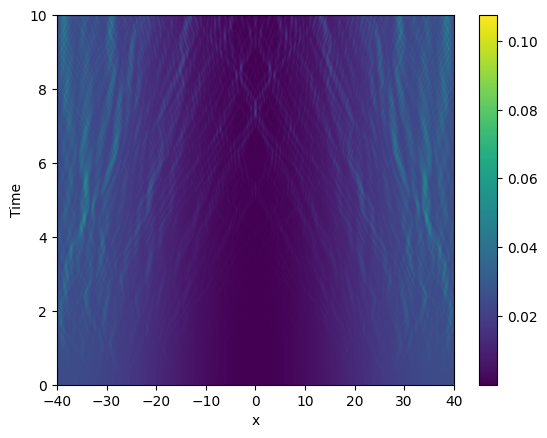

In [18]:
from math import sqrt
import numpy as np
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph

grid = CartesianGrid([[-40, 40]], 512, periodic=False)  # generate grid

# create a (normalized) wave packet with a certain form as an initial condition
initial_state = ScalarField.from_expression(grid, "sin(pi*x/80)")
initial_state /= sqrt(initial_state.to_scalar("norm_squared").integral.real)

eq = PDE({"f": f"0.5*I * laplace(f) - I * f * conjugate(f) * f"})  # define the pde

# solve the pde and store intermediate data
storage = MemoryStorage()
eq.solve(initial_state, t_range=10, dt=1e-5, tracker=[storage.tracker(0.02)], solver="scipy")

# visualize the results as a space-time plot
plot_kymograph(storage, scalar="norm_squared")

In [19]:
from pde import movie

# Save results as movie
movie(storage, 'animations/numerical_gaussian.mp4', plot_args={"scalar": "norm_squared"})

  0%|          | 0/501 [00:00<?, ?it/s]